# Webscraping the shark incident database in Hawaii

This workbook illustrates how one might scrape a database on a website for data and reformatted in a dataframe.

In [199]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import lxml
import re
import matplotlib.pyplot as plt

# Scrape

In [201]:
#prepare html for extraction
url = 'https://dlnr.hawaii.gov/sharks/shark-incidents/incidents-list/'
result = requests.get(url)
doc = BeautifulSoup(result.text)

#extract row numbers for each database entry
idx = []
for row_num in doc:
    pat_row = re.compile(r'(?<=<tr class="row-)\d+')
    idx.append(pat_row.findall(str(row_num)))

#create function for extracting rest of data, except row 7
def data(num):
    col_data = []
    for i in doc:
        pat = '(?<=column-' + str(num) +'">).+(?=</td>)'
        pat_col = re.compile(pat)
        col_data.append(pat_col.findall(str(i)))
    return col_data

#extract row 7, description
desc = []
for i in doc:
    pat = re.compile(r'(?<=column-7"><p>).+(?=</p>)')
    desc.append(pat.findall(str(i)))


# Convert to Dataframe

In [202]:
#make a list of data
tdata = list(map(data,range(1,9)))
date_and_time = list(list(tdata)[0])[4]
# time = x,y for date_and_time[x]
location = list(list(tdata)[1])[4]
activity = list(list(tdata)[2])[4]
water_clarity = list(list(tdata)[3])[4]
water_depth = list(list(tdata)[4])[4]
victim = list(list(tdata)[5])[4]
description = desc[4]
shark = list(list(tdata)[7])[4]

#prepare dataframe
data_names = [date_and_time,location,activity,water_clarity,water_depth,victim,description,shark]
column_names = ['date_and_time','location','activity',
                'water_clarity','water_depth','victim','description','shark']

#create dataframe, transpose and assign column names
df = pd.DataFrame(data_names)
df = df.T
df.columns = column_names

# Assess

In [203]:
df[['date','time']] = df['date_and_time'].str.split(', ',expand=True)
df.drop(['date_and_time'],axis=1,inplace=True)
df.head(5)

,location,activity,water_clarity,water_depth,victim,description,shark,date,time
0,"Kailua-Kona, Kahalu‘u Beach Park, approx 1.5 m...",Floating,Clear,est 1200 ft,Confidential,Bitten on right foot and calf.,"Cookiecutter shark, length unknown.",2022/02/09,before 3:30 am
1,"Kailua-Kona, Banyans, approx 130 yds from shore",Surfing,Turbid,est 6 ft,J. Willeford,Lacerations to left forearm.,"White shark, length estimated at 15 feet",2021/12/04,6:00 pm
2,"Maui, Lahaina, Mala Wharf, approx 200 yds from...",Spearfishing,Turbid,est 60 ft,Confidential,Lacerations to upper right thigh. Considered a...,"Requiem shark, length 4-6 feet",2021/11/07,10:30 am
3,"Maui, Kanaha, 400-500 yds from shore",Surfing - kite,Turbid,10-15 ft,Confidential,Minor lacerations and puncture wounds to lower...,"Tiger shark, length 5-8 feet",2021/05/15,4:40 pm
4,"O‘ahu, Kāneʻohe, North Beach, approx 10 yds fr...",Surfing,Clear,est 3 ft,P. Blanchette,Multiple lacerations to left leg below knee.,"Requiem shark, length 5-6 feet",2021/05/03,3:30 pm


In [ ]:
# convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Create day of week
df['day_of_week'] = df['date'].dt.day_name().astype('category')

# Check the results
df

,location,activity,water_clarity,water_depth,victim,description,shark,date,time,day_of_week
0,"Kailua-Kona, Kahalu‘u Beach Park, approx 1.5 m...",Floating,Clear,est 1200 ft,Confidential,Bitten on right foot and calf.,"Cookiecutter shark, length unknown.",2022-02-09,before 3:30 am,Wednesday
1,"Kailua-Kona, Banyans, approx 130 yds from shore",Surfing,Turbid,est 6 ft,J. Willeford,Lacerations to left forearm.,"White shark, length estimated at 15 feet",2021-12-04,6:00 pm,Saturday
2,"Maui, Lahaina, Mala Wharf, approx 200 yds from...",Spearfishing,Turbid,est 60 ft,Confidential,Lacerations to upper right thigh. Considered a...,"Requiem shark, length 4-6 feet",2021-11-07,10:30 am,Sunday
3,"Maui, Kanaha, 400-500 yds from shore",Surfing - kite,Turbid,10-15 ft,Confidential,Minor lacerations and puncture wounds to lower...,"Tiger shark, length 5-8 feet",2021-05-15,4:40 pm,Saturday
4,"O‘ahu, Kāneʻohe, North Beach, approx 10 yds fr...",Surfing,Clear,est 3 ft,P. Blanchette,Multiple lacerations to left leg below knee.,"Requiem shark, length 5-6 feet",2021-05-03,3:30 pm,Monday
...,...,...,...,...,...,...,...,...,...,...
141,"Kaua‘i, Waiokapua Bay; 100-150 yds from shore",Body boarding,Unknown,Unknown,M. Coots,Bitten on both legs and right hand; loss of lo...,"Tiger shark, length 12 feet.",1997-10-28,7:00 am,Tuesday
142,"O‘ahu, Sunset Beach; 40 yds from shore",Spearfishing,Unknown,Unknown,Confidential,Bitten on left leg just above ankle while nigh...,"Species unknown, length 8 feet.",1997-06-25,11:00 pm,Wednesday
143,"Maui, Paukūkalo; 100 yds from shore",Body boarding,Clear,Unknown,D. Nanod,Bitten on right calf; shark approached from be...,"Tiger shark, length 8 feet.",1996-08-29,4:00 pm,Thursday
144,"Maui, Nāpili; 100 yds from shore",Snorkeling,Turbid,15 ft,R. Rogowicz,Bitten on top of left foot and right shin.,"Species unknown, length 10 feet.",1996-01-16,3:45 pm,Tuesday


In [ ]:
# See results by day of week
df_day = df.groupby(by=['day_of_week'],sort=True).agg({'victim':'count'})
df_day.sort_values(by=['victim'],ascending=False,inplace=True)
df_day


,victim
day_of_week,
Wednesday,33
Tuesday,24
Monday,21
Saturday,19
Sunday,17
Friday,16
Thursday,16


<AxesSubplot:ylabel='day_of_week'>

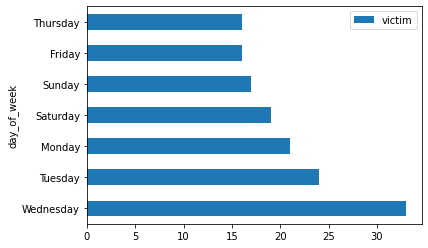

In [ ]:
# Plot the results
df_day.plot.barh()

# Check frequency by sport

In [208]:
dfg = df.groupby(by=['activity'],sort=True).agg({'victim':'count'})
dfg.sort_values(by=['victim'],ascending=False,inplace=True)
dfg


,victim
activity,
Surfing,52
Swimming,27
Snorkeling,18
Stand-up paddleboarding,12
Spearfishing,9
Body boarding,9
Swimming with sharks,4
Wading,3
Floating,2


<AxesSubplot:ylabel='activity'>

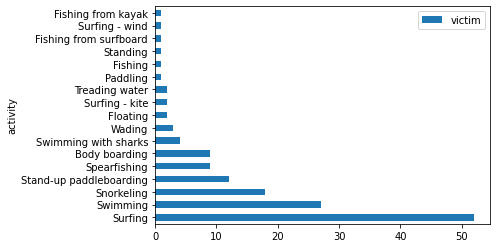

In [ ]:
# plot results
dfg.plot.barh()